# Linear Regression From Scratch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data_for_lr.csv")

In [ ]:
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [ ]:
df.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [ ]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [ ]:
# so from the above function there is one value in y which has no data so we have to drop it

##Data Processing

In [ ]:
# now drop empty row
df = df.dropna()
print("Shape of the data: ",df.shape)

Shape of the data:  (699, 2)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


Splitting Data


In [ ]:
# training input and output data
train_input = np.array(df.x[0:500]).reshape(500,1)

In [ ]:
train_output = np.array(df.y[0:500]).reshape(500,1)


In [ ]:
# validation data input and output
test_input = np.array(df.x[500:700]).reshape(199,1)
test_output = np.array(df.y[500:699]).reshape(199,1)


In [ ]:
print(test_input.shape)
print(test_output.shape)

(199, 1)
(199, 1)


#<font color="green">Linear Regression</font>

## Forward Propogation


f(x) = mx+c

In [ ]:
def forward_propagation(train_input, parameters):
  m = parameters["m"]
  c = parameters["c"]

  predictions = np.multiply(m,train_input)+c
  return predictions

### Cost Function
summation(1/2n*(y-f(x))^2)

In [ ]:
def cost_function(predictions, cost_function):
  cost = np.mean((train_output-predictions)**2)*0.5

  return cost

###Gradient Descent for Backpropogation
df = (f(x)-y)/n          
dm = df*x

dc = df*1

In [ ]:
def backward_propagation(train_input, train_output, predictions):
  derivatives = dict()
  df = predictions - train_output
  dm = np.mean(df, train_input)
  dc = np.mean(df)

  derivatives["dm"] = dm
  derivatives["dc"] = dc

  return derivatives


### Update Parameters
m = m-(learning rate * dm)         
c = c-(learning rate * dc)

In [ ]:
def update_parameters(parameters,derivatives, learning_rate):
  parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
  parameters["c"] = parameters["c"] - learning_rate * derivatives["dc"]

  return parameters

### Model Training

In [ ]:
def train(train_input, train_output, learning_rate, iters):

    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1

    plt.figure()

    #loss
    loss = list()

    #iterate
    for i in range(iters):

        #forward propagation
        predictions = forward_propagation(train_input, parameters)

        #cost function
        cost = cost_function(predictions, train_output)

        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))

        #plot function
        fig, ax = plt.subplots()

        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()

        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')

        plt.show()

        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)

        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss

## Training

Iteration = 1, Loss = 2878.5902344057167


<Figure size 640x480 with 0 Axes>

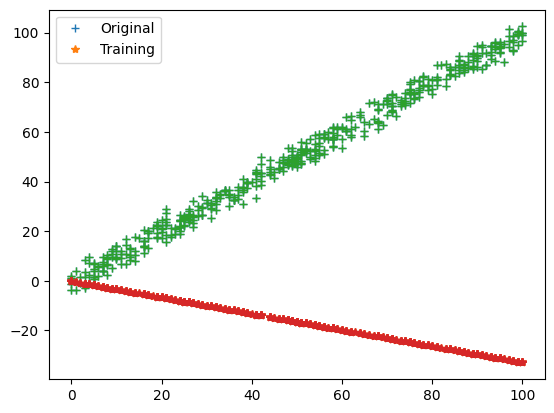

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [ ]:
loss


NameError: name 'loss' is not defined